In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('../instacart_2017_05_01/products.csv')
order_products = pd.read_csv('../instacart_2017_05_01/order_products__prior.csv')

products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id', 'reordered']]

products.set_index('product_id', inplace=True, drop=False)

In [2]:
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
cake_id = []
yogurt_id = []
lettuce_id = []
chocolate_id = []
doritos_id = []
pizza_id = []
hot_sauce_id = []
peanut_butter_id = []
milk_id = []
pretzels_id = []
soup_id = []
for index, product in products.iterrows():
    if re.search('[Cc]ookie', product['product_name']) is not None:
        cookie_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ereal', product['product_name']) is not None:
        cereal_id.append(products['product_id'].loc[index])
    if re.search('[Ii]ce [Cc]ream', product['product_name']) is not None:
        ice_cream_id.append(products['product_id'].loc[index])
    if re.search('[Cc]offee', product['product_name']) is not None:
        coffee_id.append(products['product_id'].loc[index])
    if re.search('[Aa]pple', product['product_name']) is not None:
        apple_id.append(products['product_id'].loc[index])
    if re.search('[Bb]roccoli', product['product_name']) is not None:
        broccoli_id.append(products['product_id'].loc[index])
    if re.search('[Cc]ake', product['product_name']) is not None:
        cake_id.append(products['product_id'].loc[index])
    if re.search('[Yy]ogurt|[Yy]oghurt', product['product_name']) is not None:
        yogurt_id.append(products['product_id'].loc[index])
    if re.search('[Ll]ettuce', product['product_name']) is not None:
        lettuce_id.append(products['product_id'].loc[index])
    if re.search('[Cc]hocolate', product['product_name']) is not None:
        chocolate_id.append(products['product_id'].loc[index])
    if re.search('[Dd]oritos', product['product_name']) is not None:
        doritos_id.append(products['product_id'].loc[index])
    if re.search('[Pp]izza', product['product_name']) is not None:
        pizza_id.append(products['product_id'].loc[index])
    if re.search('[Hh]ot.+[Ss]auce', product['product_name']) is not None:
        hot_sauce_id.append(products['product_id'].loc[index])
    if re.search('[Pp]eanut [Bb]utter', product['product_name']) is not None:
        peanut_butter_id.append(products['product_id'].loc[index])
    if re.search('[Mm]ilk', product['product_name']) is not None:
        milk_id.append(products['product_id'].loc[index])
    if re.search('[Pp]retzel', product['product_name']) is not None:
        pretzels_id.append(products['product_id'].loc[index])
    if re.search('[Ss]oup', product['product_name']) is not None:
        soup_id.append(products['product_id'].loc[index])
    
    
    

In [3]:
def percent_reorders(prod_id_list):
    total_orders = 0
    total_reorders = 0
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        product_orders = order_products[is_prod_id]
        
        total_orders += product_orders.shape[0]
        is_reorder = product_orders['reordered'] == 1
        total_reorders += product_orders[is_reorder].shape[0]
        
    return total_reorders / total_orders

In [4]:
cereal_reorders = percent_reorders(cereal_id)
ice_cream_reorders = percent_reorders(ice_cream_id)
coffee_reorders = percent_reorders(coffee_id)
apple_reorders = percent_reorders(apple_id)
broccoli_reorders = percent_reorders(broccoli_id)
cookie_reorders = percent_reorders(cookie_id)
yogurt_reorders = percent_reorders(yogurt_id)

In [5]:
lettuce_reorders = percent_reorders(lettuce_id)
chocolate_reorders = percent_reorders(chocolate_id)
doritos_reorders = percent_reorders(doritos_id)
pizza_reorders = percent_reorders(pizza_id)

In [6]:
hot_sauce_reorders = percent_reorders(hot_sauce_id)
peanut_butter_reorders = percent_reorders(peanut_butter_id)
milk_reorders = percent_reorders(milk_id)

In [7]:
pretzels_reorders = percent_reorders(pretzels_id)

In [8]:
soup_reorders = percent_reorders(soup_id)

In [9]:
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
# For sans-serif
from matplotlib import rc
rc("font", **{"sans-serif": ["Roboto"]})

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


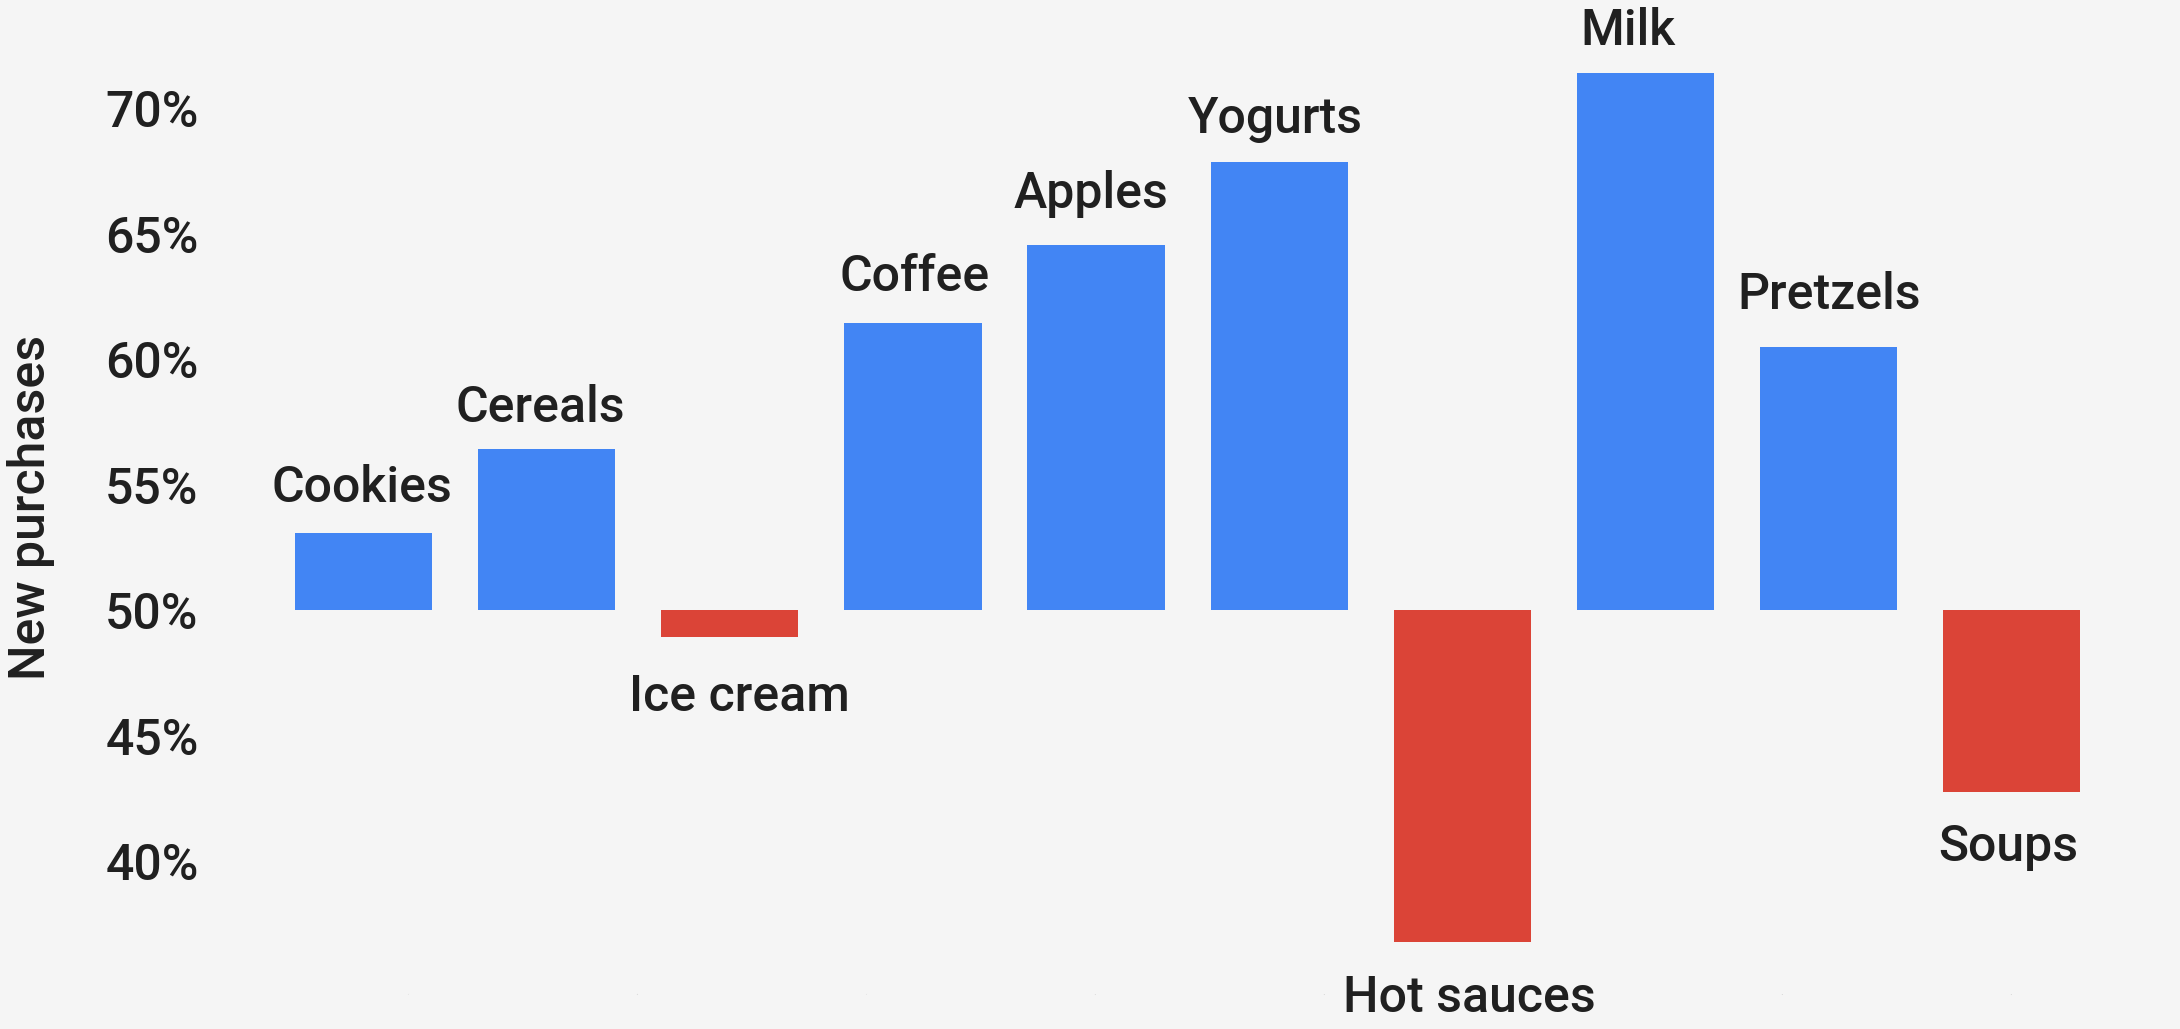

In [10]:
from numpy import arange
fig, ax = plt.subplots(figsize=(16*2.2, 8*2.2))
select_products = [cookie_reorders, cereal_reorders, ice_cream_reorders, coffee_reorders, apple_reorders, yogurt_reorders,hot_sauce_reorders, milk_reorders, pretzels_reorders, soup_reorders]
bar_heights = []
for height in select_products:
    bar_heights.append(height - 0.5)
tick_titles = ['Cookies', 'Cereals', 'Ice cream', 'Coffee', 'Apples', 'Yogurt', 'Hot sauce', 'Milk', 'Pretzels', 'Soup']

#plt.xlabel('Products', fontsize=30, labelpad=50)
plt.ylabel('New purchases',
           fontsize=50, labelpad=50, alpha=0.87, weight='medium')
y_ticks = ['40%', '45%', '50%', '55%', '60%', '65%', '70%']
y_tick_positions = [-.1, -.05, 0, .05, .1, .15, .20]

#ax.set_xticks(range(2,(2*len(bar_heights)) + 2,2))
bar_positions = (arange(len(bar_heights))  + 1)*2
#ax.xaxis.label.set_color('#424242')
#ax.yaxis.label.set_color('#424242')
#ax.tick_params(colors='#616161')
plt.xticks(fontsize=0, rotation=45)
plt.yticks(fontsize=50, alpha=0.87, weight='medium')
#ax.set_xticklabels(tick_titles)

ax.set_yticks(y_tick_positions)
ax.set_yticklabels(y_ticks)
for i, bar in enumerate(bar_heights):
    if i == 2 or i == 6 or i == 9:
        ax.bar(bar_positions[i], bar_heights[i], 1.5, color='#db4437')
    else:
        ax.bar(bar_positions[i], bar_heights[i], 1.5, color='#4285f4')
    
#ax.bar(bar_positions, bar_heights, 1.5, color='#4285f4')
ax.set_facecolor('#f5f5f5')
fig.patch.set_facecolor('#f5f5f5')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
plt.tick_params(bottom="off", top="off", left="off", right="off")


ax.text(1, .043, 'Cookies', fontsize=50, alpha=0.87, weight='medium')
ax.text(3, .075, 'Cereals', fontsize=50, alpha=0.87, weight='medium')
ax.text(4.9, -.04, 'Ice cream', fontsize=50, alpha=0.87, weight='medium')
ax.text(7.2, .127, 'Coffee', fontsize=50, alpha=0.87, weight='medium')
ax.text(9.1, .16, 'Apples', fontsize=50, alpha=0.87, weight='medium')
ax.text(11, .19, 'Yogurts', fontsize=50, alpha=0.87, weight='medium')
ax.text(12.7, -.16, 'Hot sauces', fontsize=50, alpha=0.87, weight='medium')
ax.text(15.29, .225, 'Milk', fontsize=50, alpha=0.87, weight='medium')
ax.text(17, .12, 'Pretzels', fontsize=50, alpha=0.87, weight='medium')
ax.text(19.2, -.1, 'Soups', fontsize=50, alpha=0.87, weight='medium')
plt.show()

In [11]:
bar_heights

[0.030606526972100534,
 0.06422827281204702,
 -0.010732552508928017,
 0.11433464427008677,
 0.1451967023442785,
 0.17826100331679595,
 -0.13235723035641372,
 0.21393573904141405,
 0.10488402357804483,
 -0.07234280949527061]

In [12]:
tick_titles

['Cookies',
 'Cereals',
 'Ice cream',
 'Coffee',
 'Apples',
 'Yogurt',
 'Hot sauce',
 'Milk',
 'Pretzels',
 'Soup']

In [13]:
reorder_df = pd.DataFrame([bar_heights], columns=tick_titles)

In [14]:
reorder_df

,Cookies,Cereals,Ice cream,Coffee,Apples,Yogurt,Hot sauce,Milk,Pretzels,Soup
0,0.030607,0.064228,-0.010733,0.114335,0.145197,0.178261,-0.132357,0.213936,0.104884,-0.072343


In [15]:
reorder_df.to_csv('reorder.csv', index=False)